In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook

output_notebook()

Loading BokehJS ...

In [3]:
# Load dataset
path = r"C:\Users\Admin\Clean_Air_Quality_Dataset2.csv"
df = pd.read_csv(path)

# Display first few rows
df.head()

,datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


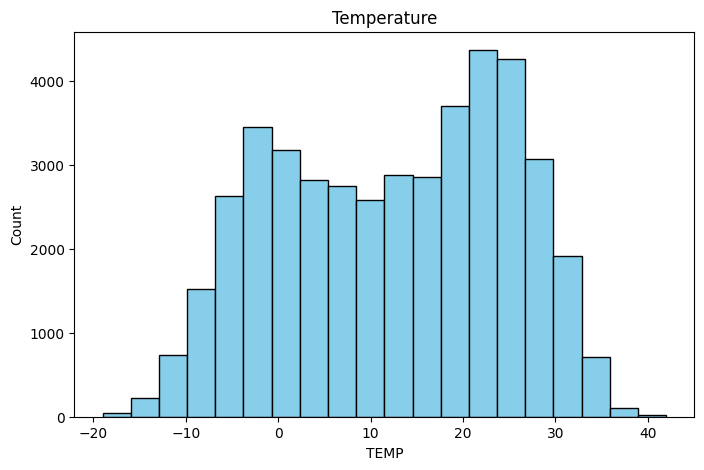

In [4]:
#!.Temperature Histogram
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.hist(df['TEMP'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature')
plt.xlabel('TEMP')
plt.ylabel('Count')
plt.show()

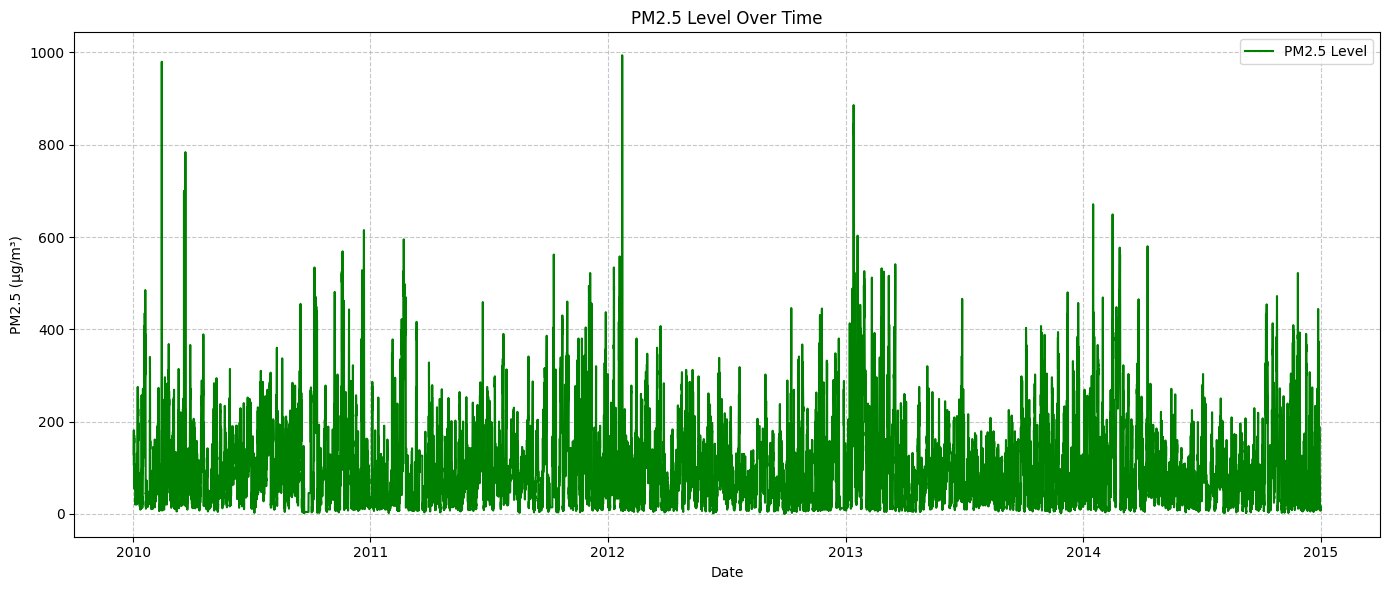

In [23]:
#  2: PM2.5 Trend Over Time--Line plot

df_pm25_cleaned = df_indexed.dropna(subset=['pm2.5'])
plt.figure(figsize=(14, 6))
plt.plot(df_pm25_cleaned.index, df_pm25_cleaned['pm2.5'], color='green', label='PM2.5 Level')
plt.title('PM2.5 Level Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

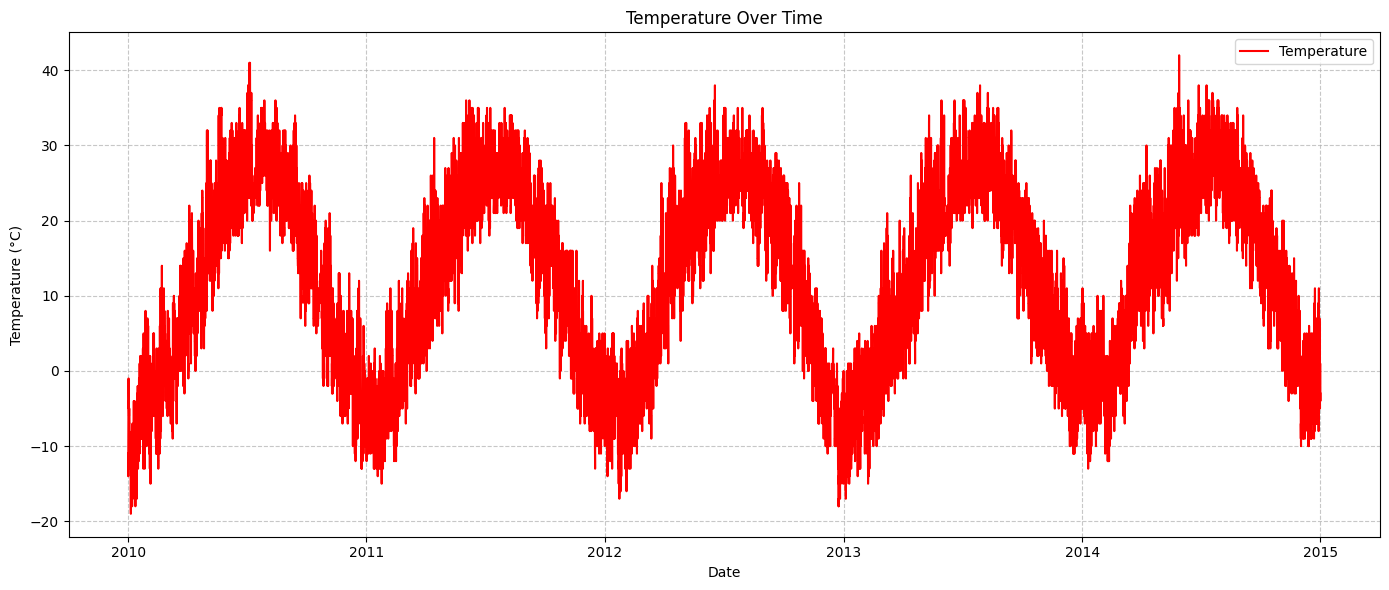

In [24]:
# 3.Temperature Trend Over Time (Line Plot)

df_temp_cleaned = df_indexed.dropna(subset=['TEMP'])
plt.figure(figsize=(14, 6))
plt.plot(df_temp_cleaned.index, df_temp_cleaned['TEMP'], color='red', label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6672\4079554666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cbwd_cleaned, x='cbwd', palette='viridis')


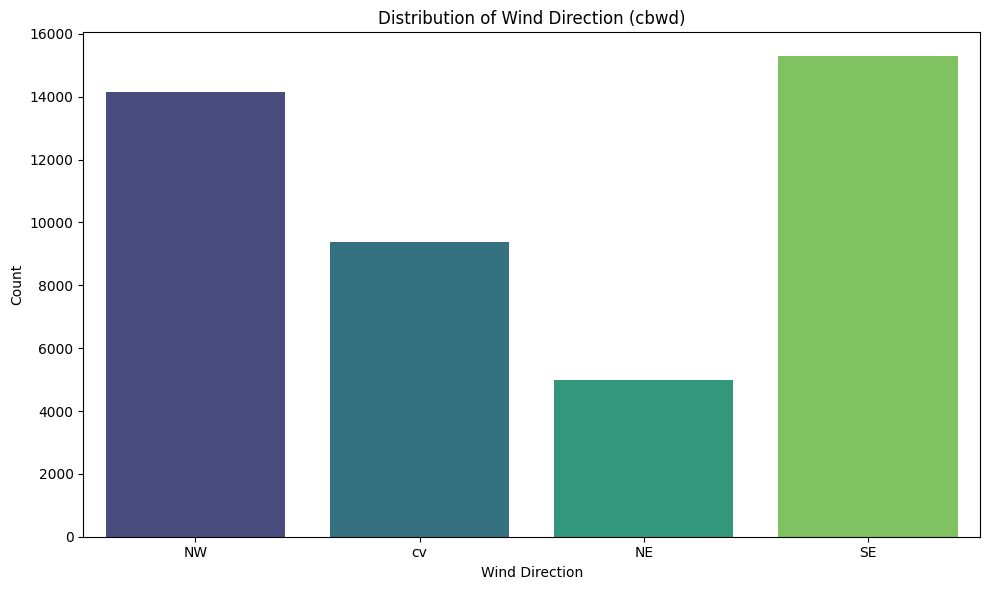

In [8]:
# Cell 4: Wind Direction Distribution-Bar chart

df_cbwd_cleaned = df.dropna(subset=['cbwd'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cbwd_cleaned, x='cbwd', palette='viridis')
plt.title('Distribution of Wind Direction (cbwd)')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

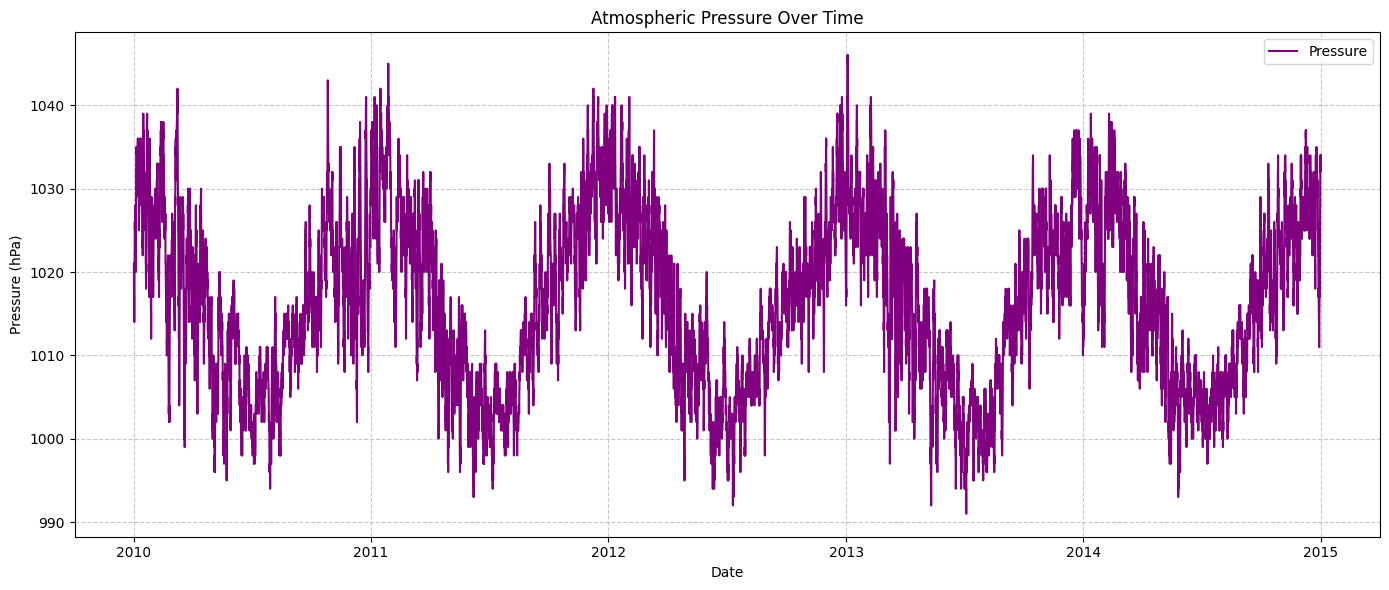

In [9]:
# 5: Atmospheric Pressure Trend--(Line Plot)

df_pres_cleaned = df_indexed.dropna(subset=['PRES'])
plt.figure(figsize=(14, 6))
plt.plot(df_pres_cleaned.index, df_pres_cleaned['PRES'], color='purple', label='Pressure')
plt.title('Atmospheric Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

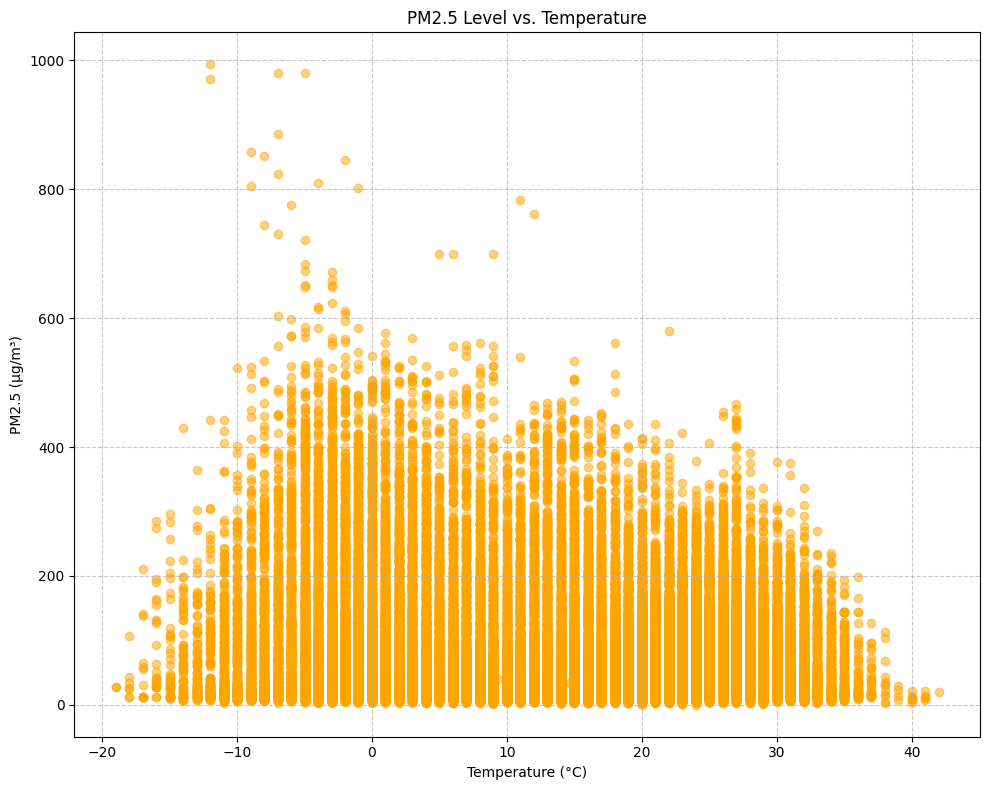

In [10]:
#  6: PM2.5 vs. Temperature--Scatter Plot

df_combined_cleaned = df_indexed.dropna(subset=['pm2.5', 'TEMP'])
plt.figure(figsize=(10, 8))
plt.scatter(df_combined_cleaned['TEMP'], df_combined_cleaned['pm2.5'], alpha=0.5, color='orange')
plt.title('PM2.5 Level vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

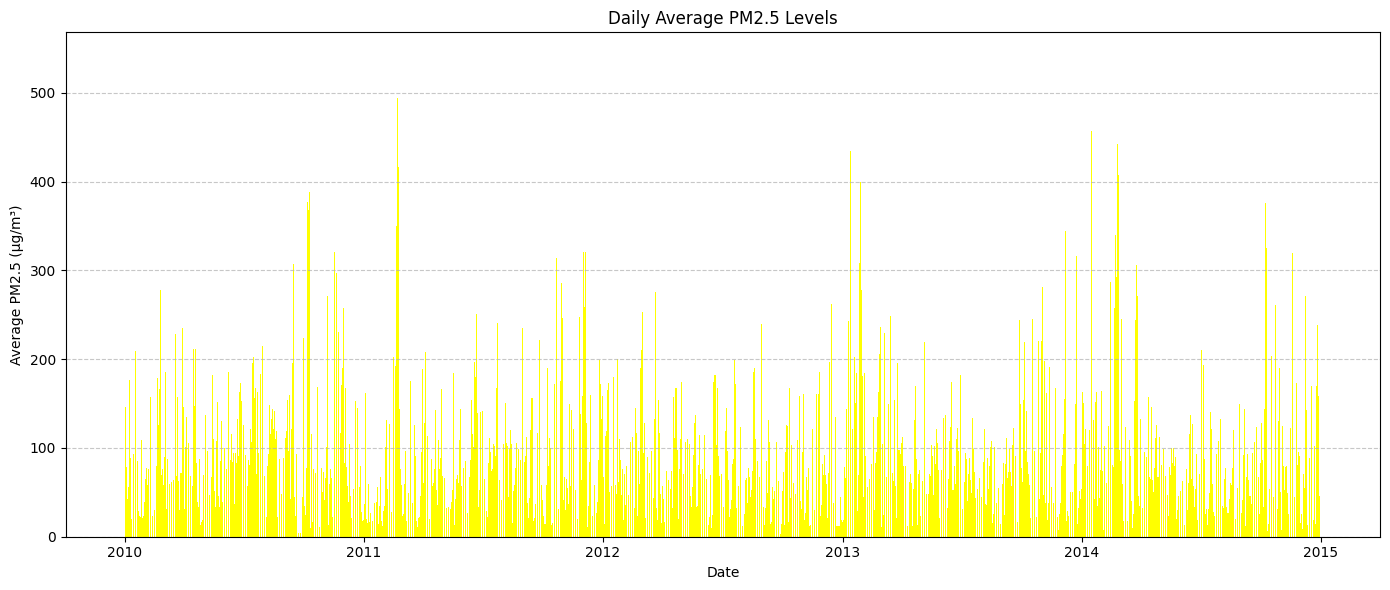

In [28]:
# Cell 7: Daily Average PM2.5-Bar chart

df_daily_pm25 = df_indexed['pm2.5'].resample('D').mean().dropna()
plt.figure(figsize=(14, 6))
plt.bar(df_daily_pm25.index, df_daily_pm25.values, width=0.8, color='yellow')
plt.title('Daily Average PM2.5 Levels')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

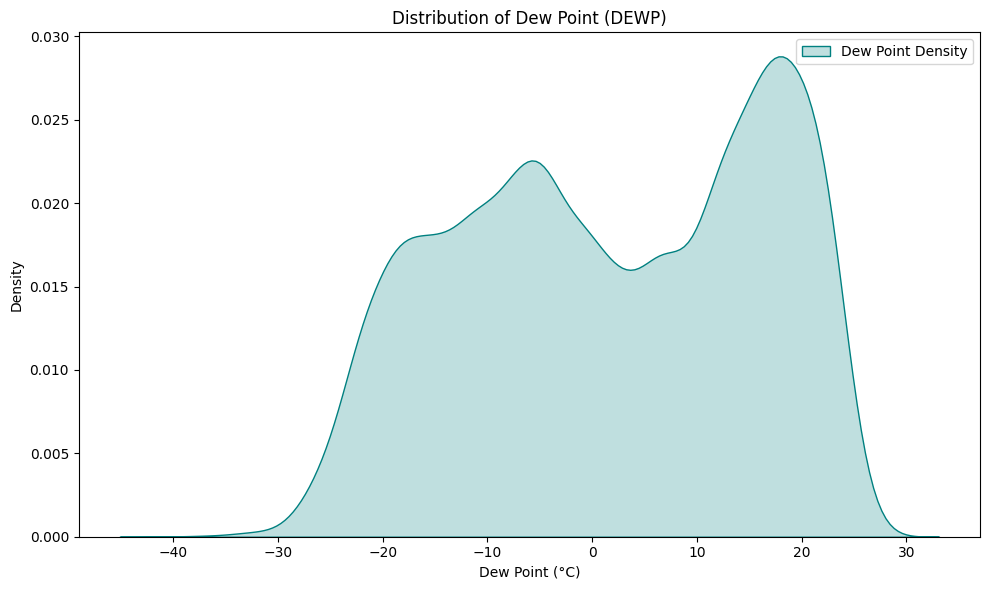

In [12]:
# 8: Distribution of Dew Point--KDE Plot seaborn

df_dewp_cleaned = df_indexed.dropna(subset=['DEWP'])
plt.figure(figsize=(10, 6))
sns.kdeplot(df_dewp_cleaned['DEWP'], fill=True, color='teal', label='Dew Point Density')
plt.title('Distribution of Dew Point (DEWP)')
plt.xlabel('Dew Point (°C)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6672\4120919603.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cbwd_pm25_cleaned, x='cbwd', y='pm2.5', palette='Paired')


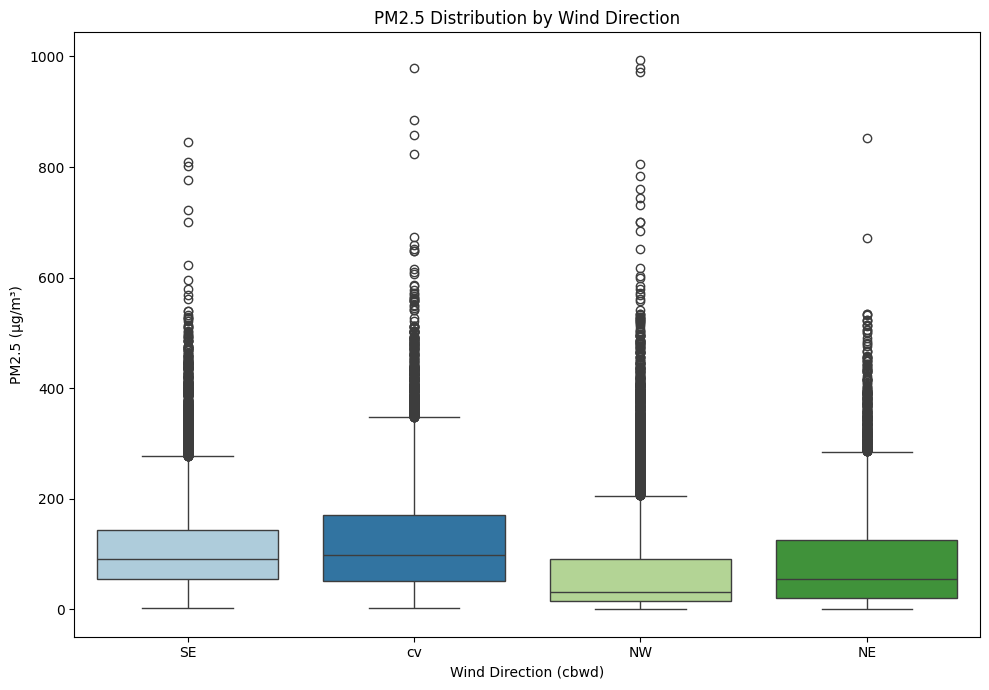

In [13]:
#9: PM2.5 Distribution by Wind Direction-BOX PLOT

df_cbwd_pm25_cleaned = df.dropna(subset=['cbwd', 'pm2.5'])
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_cbwd_pm25_cleaned, x='cbwd', y='pm2.5', palette='Paired')
plt.title('PM2.5 Distribution by Wind Direction')
plt.xlabel('Wind Direction (cbwd)')
plt.ylabel('PM2.5 (µg/m³)')
plt.tight_layout()
plt.show()


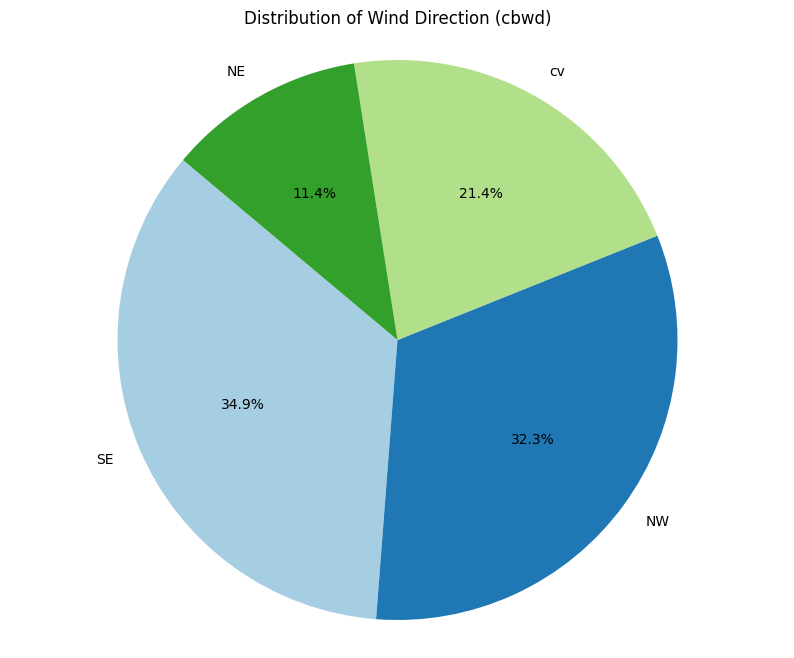

In [17]:
#10.Distribution of Wind Direction--Pie Chart
# Load the dataset
#df = pd.read_csv(path)
# Clean the data by dropping rows with NaN values in the 'cbwd' column
df_cleaned = df.dropna(subset=['cbwd'])
cbwd_counts = df_cleaned['cbwd'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(cbwd_counts, labels=cbwd_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Wind Direction (cbwd)')
plt.axis('equal') # Ensures the pie chart is circular
plt.show()

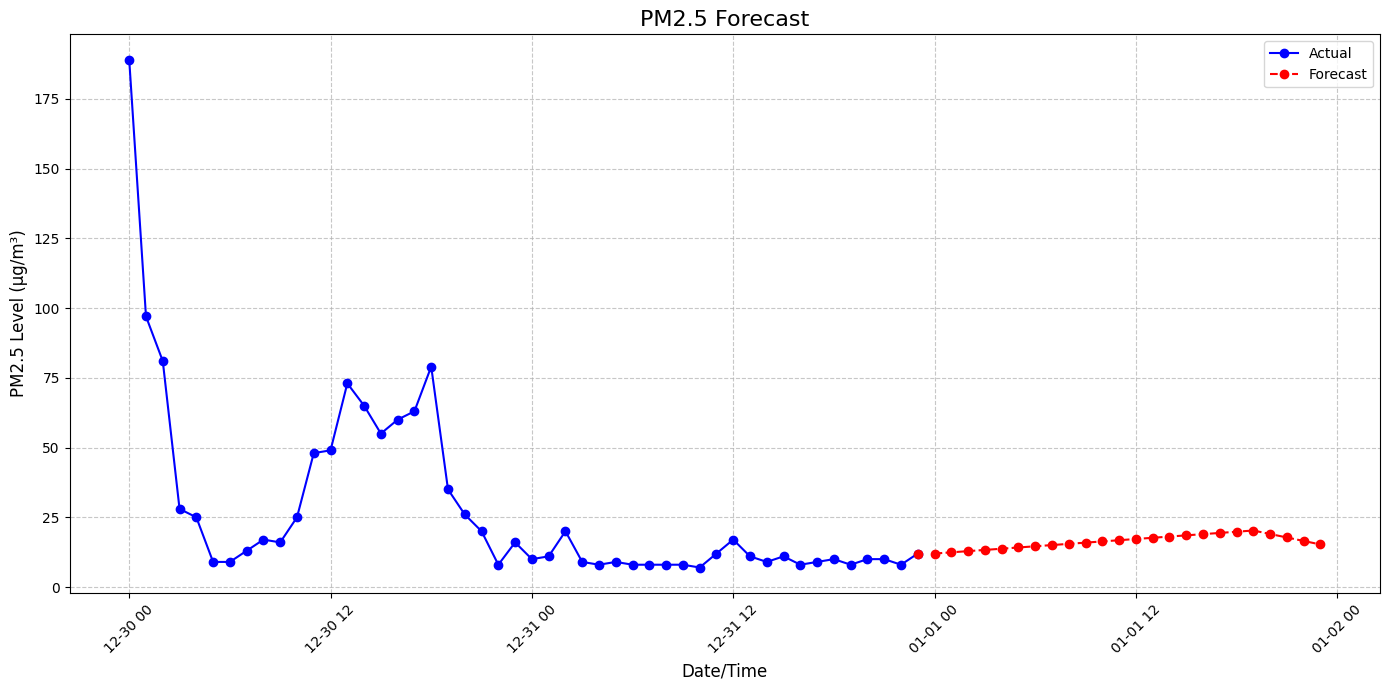

In [22]:
# 11.: PM2.5 Forecast Plot

plt.figure(figsize=(14, 7))

# Plot the 'Actual' historical data
plt.plot(actual_data.index, actual_data.values, marker='o', linestyle='-', color='blue', label='Actual')

# Plot the 'Forecast' data
plt.plot(forecast_df.index, forecast_df['pm2.5'], marker='o', linestyle='--', color='red', label='Forecast')

# Highlight the transition point between actual and forecast
plt.plot(actual_data.index[-1], actual_data.values[-1], 'o', color='red')

# Customize the plot
plt.title('PM2.5 Forecast', fontsize=16)
plt.xlabel('Date/Time', fontsize=12)
plt.ylabel('PM2.5 Level (µg/m³)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Improve x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()